In [9]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('RawData.csv')
df.head()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.004611,0.067626,0.006536,0.020513,0.070970
1,0.009600,0.072171,0.004032,0.021032,0.075281
2,0.014590,-0.151149,-0.111007,0.021361,0.188746
3,0.019595,-0.144965,-0.112283,0.056673,0.191923
4,0.024600,-0.253187,0.075868,0.057309,0.270451


Text(0, 0.5, 'a_z')

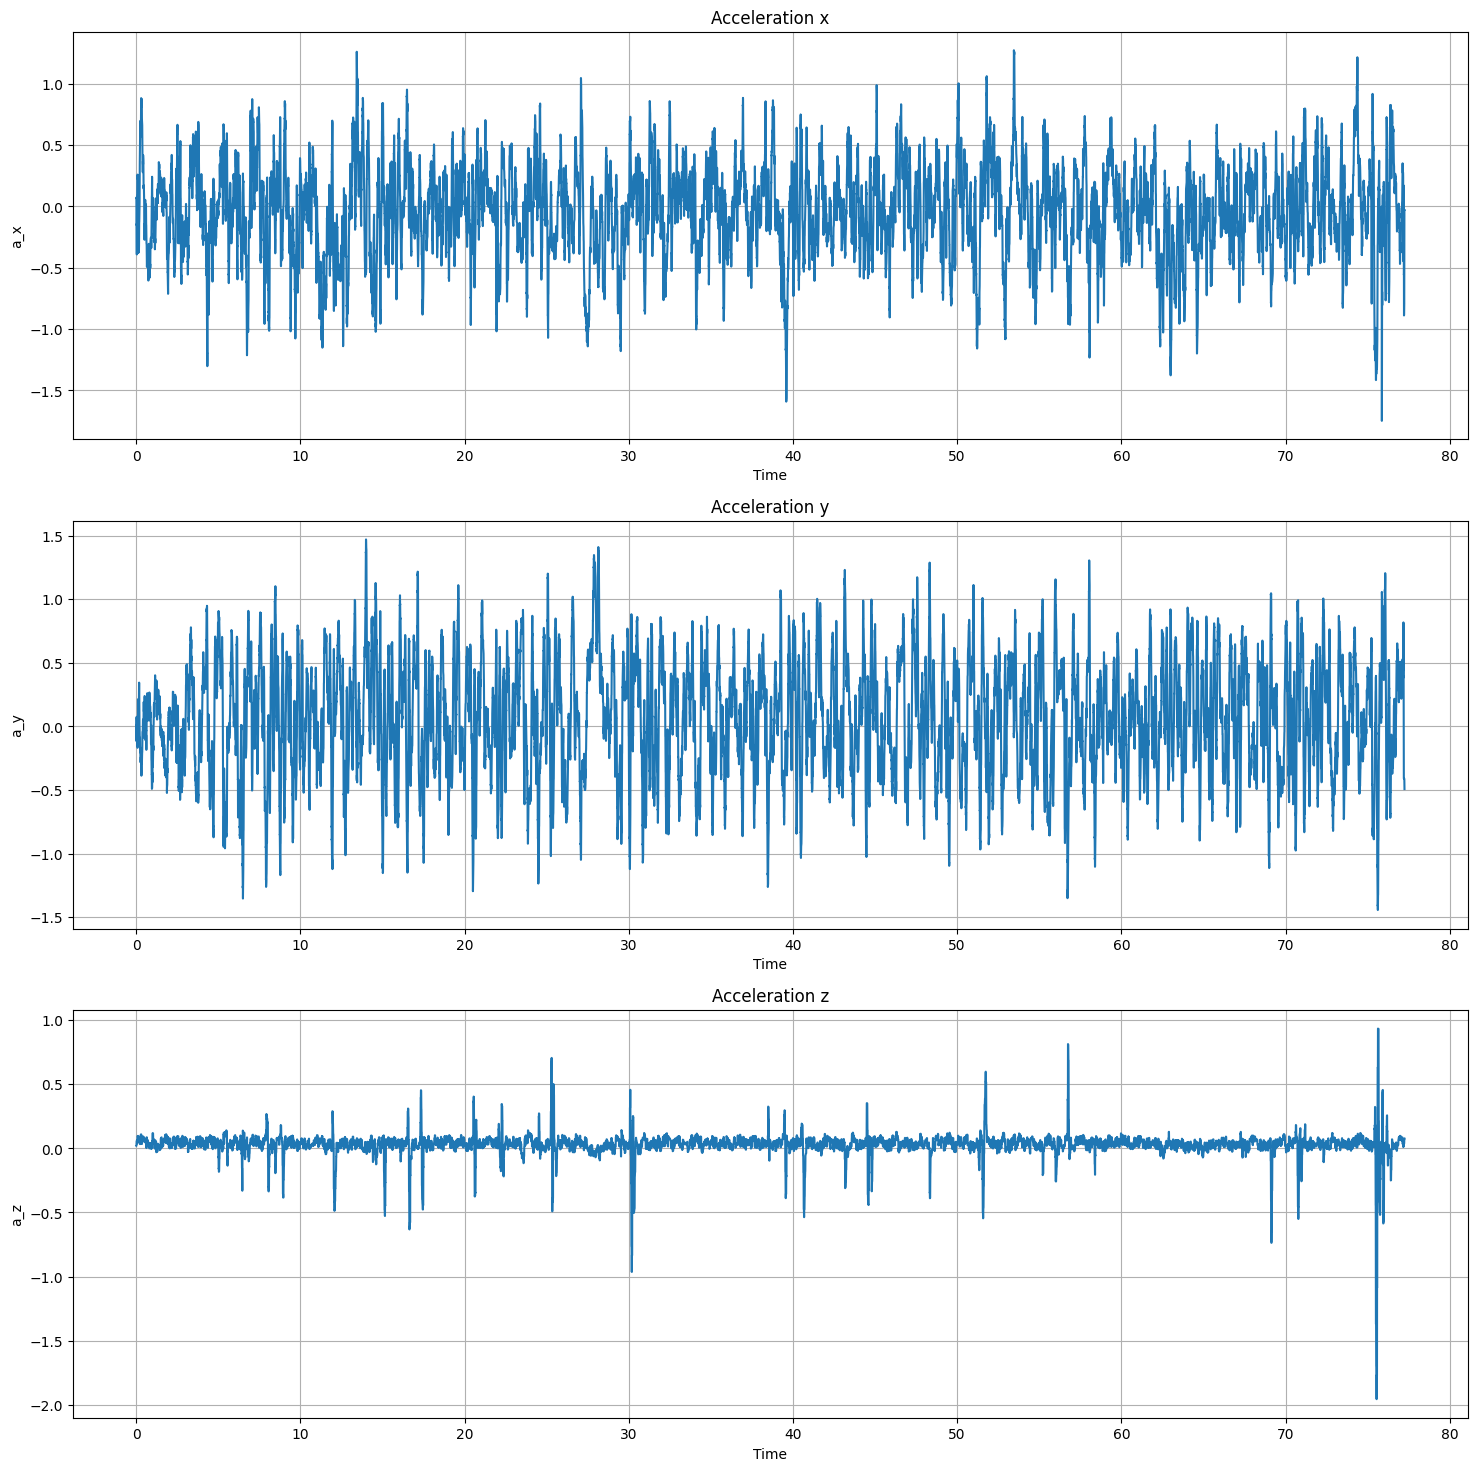

In [12]:
plt.figure(figsize=(18,18))

plt.subplot(3,1,1)
plt.plot(df['Time (s)'], df['Linear Acceleration x (m/s^2)'])
plt.grid()
plt.title('Acceleration x')
plt.xlabel('Time')
plt.ylabel('a_x')

plt.subplot(3,1,2)
plt.plot(df['Time (s)'], df['Linear Acceleration y (m/s^2)'])
plt.grid()
plt.title('Acceleration y')
plt.xlabel('Time')
plt.ylabel('a_y')

plt.subplot(3,1,3)
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'])
plt.grid()
plt.title('Acceleration z')
plt.xlabel('Time')
plt.ylabel('a_z')

In [6]:
from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

The number of steps is 79.5


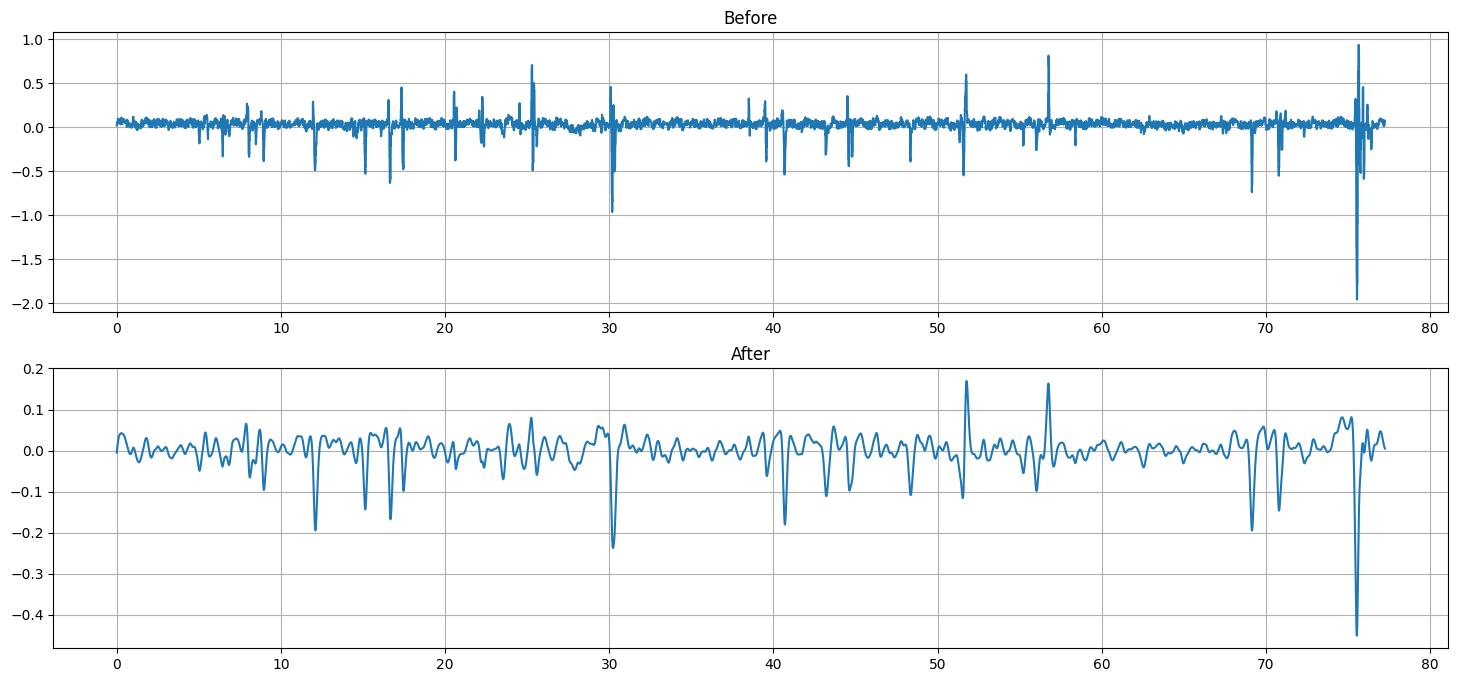

In [8]:
#Filter the Noice
noisy_signal = df['Linear Acceleration z (m/s^2)']
time = df['Time (s)']
order = 2 #second order of filter
dt = (time[len(time) - 1] - time[0]) / len(time)

fs = 1/dt
nyq = 0.5 * fs 
cutoff_L = 1/0.5 #Lowpass cut-off
cutoff_H = 1/5 #Highpass cut-of

lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff_L, fs, nyq, order)
final_filtered_signal = butter_highpass_filter(lowpass_filtered, cutoff_H, fs, nyq, order) 

plt.figure(figsize=(18,8))

plt.subplot(2,1,1)
plt.plot(time, noisy_signal)
plt.grid()
plt.title('Before')

plt.subplot(2,1,2)
plt.plot(time, final_filtered_signal)
plt.grid()
plt.title('After')

# Step counting
stepdata = final_filtered_signal
steps = 0
for i in range(stepdata.shape[0]-1):
    if stepdata[i]/stepdata[i+1] < 0:
        steps = steps + 0.5

print('The number of steps is', steps)

